# Khởi tạo

In [1]:
# Khai báo dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from xgboost import plot_importance, plot_tree
import sqlalchemy
import warnings
from pmdarima.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
# Make mysql connection
url = "mysql+mysqldb://root:@localhost/weather_iot"
engine = sqlalchemy.create_engine(url)

In [3]:
df_sensor = pd.read_csv("./weather.csv")
df_sensor.info()
# df_sensor.to_sql('sensor', con=engine, if_exists='replace', index=False)
# df_sensor = pd.read_sql_table('sensor', con=engine)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   province  181960 non-null  object 
 1   max       181960 non-null  int64  
 2   min       181960 non-null  int64  
 3   wind      181960 non-null  int64  
 4   wind_d    181960 non-null  object 
 5   rain      181960 non-null  float64
 6   humidi    181960 non-null  int64  
 7   cloud     181960 non-null  int64  
 8   pressure  181960 non-null  int64  
 9   date      181960 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 13.9+ MB


In [ ]:
# # list province from sensor table
# df_province = df_sensor['province']
# df_province = df_province.drop_duplicates()

# Xử lý dữ liệu

## Lọc dữ liệu

In [5]:
# filter

# Lọc dữ liệu theo tỉnh
province_select = "Ha Noi"
df_province = df_sensor[df_sensor['province'].isin([province_select])] 


# Sắp xếp lại giá trị theo thứ tự ngày
df_province.sort_values(by=['date'])

# Tách ngày, tháng, năm ra từ cột date
df_province['day'] = df_province['date'].apply(lambda x: x.split('-')[2]).astype(int)
df_province['month'] = df_province['date'].apply(lambda x: x.split('-')[1]).astype(int)
df_province['year'] = df_province['date'].apply(lambda x: x.split('-')[0]).astype(int)

# Đặt lại index là cột date
df_province = df_province.set_index("date")

# Sắp xếp lại dữ liệu theo thứ tự ngày
df_province.sort_index(inplace=True)
df_province.head()
df_province.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,day,month,year
date,,,,,,,,,,,,
2009-01-01,Ha Noi,19,12,6,NNE,0.0,70,44,1025,1,1,2009
2009-01-02,Ha Noi,18,12,6,ESE,0.5,65,28,1025,2,1,2009
2009-01-03,Ha Noi,20,13,5,ESE,0.7,74,40,1022,3,1,2009
2009-01-04,Ha Noi,25,12,5,SSW,0.0,81,46,1018,4,1,2009
2009-01-05,Ha Noi,23,14,5,S,1.3,90,75,1017,5,1,2009


## Tính correlation

In [ ]:
df_province.corr()
# plot correlation
sns.heatmap(df_province.corr(), cmap='RdYlGn', annot=True, fmt=".2f")
plt.show()

# corr = df_ha_noi.corr()
# plt.subplots(figsize=(8, 8))
# sns.heatmap(corr, cmap='RdYlGn', annot=True)
# plt.show()


In [ ]:
# df to mysql
df_province.corr().to_sql(name='weather_corr', con=engine, if_exists = 'replace', index=False)

# Data virtualization

In [ ]:
df_province['min'].plot(figsize=(15, 6))
df_province['max'].plot(figsize=(15, 6))

In [ ]:
# plot rain
df_province['rain'].plot(figsize=(15, 6))

In [ ]:
# plot humidity
df_province['wind'].plot(figsize=(15, 6))

In [ ]:
# draw cloud
df_province['cloud'].plot(figsize=(15, 6))
# draw rain
df_province['rain'].plot(figsize=(15, 6))

# Model

In [48]:
from XGBoost import XGBoostRegressor
# label_select = 'max'
# feature_select = df_province.columns.drop([label_select] + ["wind_d", "province", "min", "wind", "cloud", "rain"]).tolist()

label_select = 'max'
feature_select = ['humidi', 'pressure', 'day', 'month', 'year']
# feature_select = ['humidi', 'pressure']

x_train,x_test = train_test_split(df_province, train_size=0.8)
# train split
X_train = np.array(x_train[feature_select].values.tolist())
y_train = x_train[label_select]
# test split
X_test = np.array(x_test[feature_select].values.tolist())
y_test = x_test[label_select]

# remove index 
# X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
print(np.shape(X_train))
# reshape y_train (1000,1)
y_train = y_train.to_numpy().reshape(len(y_train), 1)
print(np.shape(y_train))



(3639, 5)
(3639, 1)


[[29.7200055 ]ion for the iteration 100000----->12.676602404727046 :)
 [29.23527384]
 [28.83923616]
 [29.03456523]
 [29.85829051]
 [29.74319068]
 [29.16976505]
 [28.24888109]
 [27.00271228]
 [26.35533821]
 [26.36585137]
 [26.63789293]
 [26.95151744]
 [27.52390632]
 [27.68974435]
 [27.93684838]
 [28.09525844]
 [28.14280104]
 [28.11639519]
 [27.67601052]
 [28.17445095]
 [28.44372847]
 [28.35080214]
 [28.59790617]
 [28.8450102 ]
 [28.42679903]
 [27.59460904]
 [27.6051222 ]
 [28.05921564]
 [28.47639007]
 [28.36129024]
 [27.52167228]
 [27.68739989]
 [28.42243119]
 [28.61044271]
 [27.92614962]
 [27.30094904]
 [27.84373645]
 [28.32000338]
 [28.22707705]
 [28.49635458]
 [28.24078582]
 [28.23067302]
 [29.09874528]
 [28.93929847]
 [28.7280767 ]
 [29.15999665]
 [30.04281442]
 [30.31209195]
 [30.44090055]
 [29.84530143]
 [28.54004011]
 [27.57480916]
 [27.68144427]
 [28.06901723]
 [28.56745766]
 [28.72586772]
 [29.09126719]
 [29.41231967]
 [30.36165793]
 [29.49254892]
 [29.09651124]
 [29.29184031]


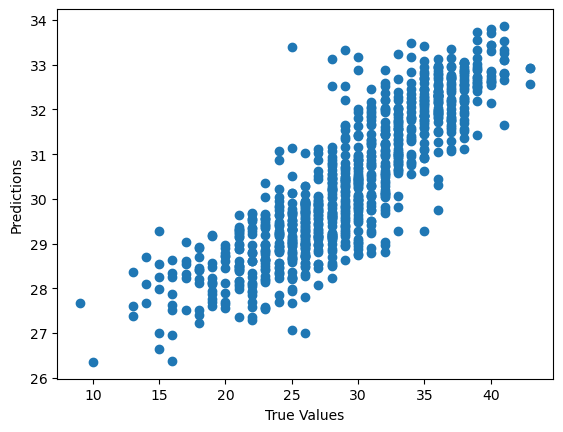

In [50]:
import numpy as np
import pandas as pd
import math

from sklearn.datasets import make_regression

from sklearn.metrics import r2_score

class LinearRegression:
    def __init__(self, learning_rate, iteration):
        """
        :param learning_rate: A samll value needed for gradient decent, default value id 0.1.
        :param iteration: Number of training iteration, default value is 10,000.
        """
        self.m = None
        self.n = None
        self.w = None
        self.lr = learning_rate
        self.it = iteration

    def cost_function(self, y, y_pred):
        """
        :param y: Original target value.
        :param y_pred: predicted target value.
        """
        cost = (1 / (2*self.m)) * np.sum(np.square(y_pred - y))
        return cost
    
    def hypothesis(self, weights, X):
        """
        :param weights: parameter value weight.
        :param X: Training samples.
        """
        return np.dot(X, weights)

    def train(self, X, y):
        """
        :param X: training data feature values ---> N Dimentional vector.
        :param y: training data target value -----> 1 Dimentional array.
        """
        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)
        # Target value should be in the shape of (n, 1) not (n, ).
        # So, this will check that and change the shape to (n, 1), if not.
        try:
            y.shape[1]
        except IndexError as e:
            # we need to change it to the 1 D array, not a list.
            print("ERROR: Target array should be a one dimentional array not a list"
                  "----> here the target value not in the shape of (n,1). \nShape ({shape_y_0},1) and {shape_y} not match"
                  .format(shape_y_0 = y.shape[0] , shape_y = y.shape))
            return 
        
        # m is the number of training samples.
        self.m = X.shape[0]
        # n is the number of features.
        self.n = X.shape[1]

        # Set the initial weight.
        self.w = np.zeros((self.n , 1))

        for it in range(1, self.it+1):
            # 1. Find the predicted value through the hypothesis.
            # 2. Find the Cost function value.
            # 3. Find the derivation of weights.
            # 4. Apply Gradient Decent.
            y_pred = self.hypothesis(self.w, X)

            cost = self.cost_function(y, y_pred)
            # fin the derivative.
            dw = (1/self.m) * np.dot(X.T, (y_pred - y))

            # change the weight parameter.
            self.w = self.w - self.lr * dw
            print("The Cost function for the iteration {}----->{} :)".format(it, cost), end="\r")
            # if math.isnan(cost):
            #     break
            # if it % 1000 == 0:
            #     print("The Cost function for the iteration {}----->{} :)".format(it, cost))
    def predict(self, test_X):
        """
        :param test_X: feature values to predict.
        """
        # Insert constant ones for bias weights
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred
        
reg = LinearRegression(learning_rate= 1e-7 , iteration=100000)
reg.train(X_train, y_train)
y_pred = reg.predict(X_test)
print(y_pred)
# print("R2 Score: ", r2_score(y_test, y_pred))
# print("rmse", np.sqrt(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: ', r2_score(y_test, y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))

# plot the predicted values
# plt.scatter(y_test, y_pred)
plt.plot(y_test, y_pred, 'o')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [10]:
import numpy as np
import pandas as pd
import math
import sys

from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

""" Đây là lời giải thích cho đoạn mã trên:
1. Lớp DecisionNode: Lớp này dùng để tạo các nút trong cây quyết định. Nó có hai thuộc tính:
a) tạp chất: Thuộc tính này lưu trữ tạp chất của nút. Nó được sử dụng để tính toán mức tăng.
b) câu hỏi: Thuộc tính này lưu trữ câu hỏi được hỏi trong một nút cụ thể. Nó được sử dụng để phân chia tập dữ liệu.
2. Phương thức __init__: Phương thức này khởi tạo đối tượng của lớp DecisionNode. Nó có 6 tham số:
a) tạp chất: Tham số này lưu trữ tạp chất của nút. Nó được sử dụng để tính toán mức tăng.
b) câu hỏi: Tham số này lưu trữ câu hỏi được hỏi trong một nút cụ thể. Nó được sử dụng để phân chia tập dữ liệu.
c) true_subtree: Tham số này lưu trữ cây con bên trái của nút.
d) false_subtree: Tham số này lưu cây con bên phải của nút.
e) Feature_index: Tham số này lưu trữ chỉ mục của tính năng được sử dụng để phân chia tập dữ liệu.
f) ngưỡng: Tham số này lưu trữ giá trị ngưỡng của tính năng được sử dụng để phân tách tập dữ liệu.
  """
class DecisionNode:
    """
    Class for a parent/leaf node in the decision tree.
    A Node with node information about it's left and right nodes if any. it has the impurity info also.
    """
    def __init__(self, impurity=None, question=None, feature_index=None, threshold=None,
                 true_subtree=None, false_subtree=None):
        """
        :param
        """
        self.impurity = impurity
        # Which question to ask , to split the dataset.
        self.question = question 
        # Index of the feature which make the best fit for this node.
        self.feature_index = feature_index
        # The threshold value for that feature to make the split.
        self.threshold = threshold
        # DecisionNode Object of the left subtree.
        self.true_left_subtree = true_subtree
        # DecisionNode Object of the right subtree.
        self.false_right_subtree = false_subtree

""" 
Here is the explanation for the code above:
1. The class is initialized with the value of the label. This value is determined by the majority vote of the labels in the parent node.
2. The prediction value is stored as an attribute of the class. 
"""
class LeafNode:
    """ Leaf Node of the decision tree."""
    def __init__(self, value):
        self.prediction_value = value

class DecisionTree:
    """Common class for making decision tree for classification and regression tasks."""
    def __init__(self, min_sample_split=3, min_impurity=1e-7, max_depth=float('inf'),
                 impurity_function=None, leaf_node_calculation=None):
        """Hàm khởi tạo
        1. Tạo cây rỗng
        2. Gán các giá trị mặc định cho các tham số
        3. Tạo hàm tính độ nhánh nếu chưa có 
        """
        self.root = None
        self.min_sample_split = min_sample_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.impurity_function = impurity_function
        self.leaf_node_calculation = leaf_node_calculation

    def _partition_dataset(self, Xy, feature_index, threshold):
        """Tách tập dữ liệu dựa trên tính năng và ngưỡng đã cho.
        
        """
        split_func = None
        if isinstance(threshold, int) or isinstance(threshold, float):
            split_func = lambda sample: sample[feature_index] >= threshold
        else:
            split_func = lambda sample: sample[feature_index] == threshold

        X_1 = np.array([sample for sample in Xy if split_func(sample)])
        X_2 = np.array([sample for sample in Xy if not split_func(sample)])

        return X_1, X_2


    def _find_best_split(self, Xy):
        """ Tìm ngưỡng tốt nhất giúp phân chia dữ liệu tốt.
        
        """
        # cái này sẽ chứa tính năng và giá trị của nó để tạo ra sự phân chia tốt nhất (higest gain).
        best_question = tuple() 
        
        # best data split.
        best_datasplit = {}
        
        largest_impurity = 0
        n_features = (Xy.shape[1] - 1)
        # iterate over all the features.
        for feature_index in range(n_features):
            # find the unique values in that feature.
            unique_value = set(s for s in Xy[:,feature_index])
            # iterate over all the unique values to find the impurity.
            for threshold in unique_value:
                # split the dataset based on the feature value.
                true_xy, false_xy = self._partition_dataset(Xy, feature_index, threshold)
                # skip the node which has any on type 0. because this means it is already pure.
                if len(true_xy) > 0 and len(false_xy) > 0:
                    

                    # find the y values.
                    y = Xy[:, -1]
                    true_y = true_xy[:, -1]
                    false_y = false_xy[:, -1]

                    # calculate the impurity function.
                    # impurity = self.impurity_function(y, true_y, false_y)
                    impurity = self.impurity_function(y, true_y, false_y)
                    # impurity = self.information_gain(y, true_y, false_y)

                    # if the calculated impurity is larger than save this value for comaparition.
                    if impurity > largest_impurity:
                        largest_impurity = impurity
                        best_question = (feature_index, threshold)
                        best_datasplit = {
                                    "leftX": true_xy[:, :n_features],   # X of left subtree
                                    "lefty": true_xy[:, n_features:],   # y of left subtree
                                    "rightX": false_xy[:, :n_features],  # X of right subtree
                                    "righty": false_xy[:, n_features:]   # y of right subtree
                        }
                    
        return largest_impurity, best_question, best_datasplit

    def _build_tree(self, X, y, current_depth=0):
        """
        This is a recursive method to build the decision tree.
        """
        n_samples, n_features = X.shape
        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)
        # find the Information gain on each feature each values and return the question which splits the data very well
        # based on the impurity function. (classfication - Information gain, regression - variance reduction).
        if (n_samples >= self.min_sample_split) and (current_depth <= self.max_depth):
            # find the best split/ which question split the data well.
            impurity, quesion, best_datasplit = self._find_best_split(Xy)
            if impurity > self.min_impurity:
                # Build subtrees for the right and left branch.
                true_branch = self._build_tree(
                    best_datasplit["leftX"], best_datasplit["lefty"], current_depth + 1)
                false_branch = self._build_tree(
                    best_datasplit["rightX"], best_datasplit["righty"], current_depth + 1)
                return DecisionNode(impurity=impurity, question=quesion, feature_index=quesion[0], threshold=quesion[1],
                                    true_subtree=true_branch, false_subtree=false_branch)

        leaf_value = self._leaf_value_calculation(y)
        return LeafNode(value=leaf_value)
    def _information_gain(self, X, y, thresh):
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0: 
            return 0
        
        child_loss = (n_left / n) * self._entropy(y[left_idx]) + (n_right / n) * self._entropy(y[right_idx])
        return parent_loss - child_loss
    def _entropy(self, y):
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def train(self, X, y):
        """
        Build the decision tree.

        :param X: Train features/dependant values.
        :param y: train target/independant value.
        """
        self.root = self._build_tree(X, y, current_depth=0)

    def predict_sample(self, x, tree=None):
        """move form the top to bottom of the tree make a prediction of the sample by the
            value in the leaf node """
        if tree is None:
            tree = self.root
        # if it a leaf node the return the prediction.
        if isinstance(tree , LeafNode):

            return tree.prediction_value
        feature_value = x[tree.feature_index]

        branch = tree.false_right_subtree

        if isinstance(feature_value, int) or isinstance(feature_value, float):
            
            if feature_value >= tree.threshold:

                branch = tree.true_left_subtree
        elif feature_value == tree.threshold:
            branch = tree.true_left_subtree

        return self.predict_sample(x, branch)

    def predict(self, test_X):
        """ predict the unknow feature."""
        x = np.array(test_X)
        y_pred = [self.predict_sample(sample) for sample in x]
        # y_pred = np.array(y_pred)
        # y_pred = np.expand_dims(y_pred, axis = 1)
        return y_pred
    
    def draw_tree(self, tree = None, indentation = " "):
        """print the whole decitions of the tree from top to bottom."""
        if tree is None:
            tree = self.root

        def print_question(question, indention):
            """
            :param question: tuple of feature_index and threshold.
            """
            feature_index = question[0]
            threshold = question[1]

            condition = "=="
            if isinstance(threshold, int) or isinstance(threshold, float):
                condition = ">="
            print(indention,"Is {col}{condition}{value}?".format(col=feature_index, condition=condition, value=threshold))

        if isinstance(tree , LeafNode):
            print(indentation,"The predicted value -->", tree.prediction_value)
            return
        
        else:
            # print the question.
            print_question(tree.question,indentation)
            if tree.true_left_subtree is not None:
                # travers to the true left branch.
                print (indentation + '----- True branch :)')
                self.draw_tree(tree.true_left_subtree, indentation + "  ")
            if tree.false_right_subtree is not None:
                # travers to the false right-side branch.
                print (indentation + '----- False branch :)')
                self.draw_tree(tree.false_right_subtree, indentation + "  ")
  
class DecisionTreeRegression(DecisionTree):
    """ Decision Tree for the classification problem."""
    def __init__(self, min_sample_split=3, min_impurity=1e-7, max_depth=float('inf'),
                 ):
        """
        :param min_sample_split: min value a leaf node must have.
        :param min_impurity: minimum impurity.
        :param max_depth: maximum depth of the tree.
        """
        self._impurity_function = self._claculate_variance_reduction
        self._leaf_value_calculation = self._calculate_colum_mean
        super(DecisionTreeRegression, self).__init__(min_sample_split=min_sample_split, min_impurity=min_impurity, max_depth=max_depth,
                         impurity_function=self._impurity_function, leaf_node_calculation=self._leaf_value_calculation)
    

    def _claculate_variance_reduction(self, y, y1, y2):
        """
        Calculate the Variance reduction.

        :param y: target value.
        :param y1: target value for dataset in the true split/right branch.
        :param y2: target value for dataset in the false split/left branch.
        """
        # propobility of true values.
        variance = np.var(y)
        variance_y1 = np.var(y1)
        variance_y2 = np.var(y2)

        y_len = len(y)
        fraction_1 = len(y1) / y_len 
        fraction_2 = len(y2) / y_len
        variance_reduction = variance - (fraction_1 * variance_y1 + fraction_2 * variance_y2)
        return  variance_reduction
      
       
        

    def _calculate_colum_mean(self, y):
        """
        calculate the prediction value for that leaf node using mean.
        
        :param y: leaf node target array.
        """
        mean = np.mean(y, axis=0)
        return mean



    def train(self, X, y):
        """
        Build the tree.

        :param X: Feature array/depentant values.
        :parma y: target array/indepentant values.
        """
        # train the model.
        super(DecisionTreeRegression, self).train(X, y)
reg = DecisionTreeRegression()
reg.train(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
from XGBoost import XGBoostRegressor
reg = XGBoostRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(y_pred)

In [ ]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: ', r2_score(y_test, y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
# print socre
# print("Score: ", r2_score(y, y_pred))

## Model tự code

In [27]:
corr = df_province.corr()
corr = corr.drop(['min', 'max', 'wind', 'cloud', 'rain'])
corr['max'].sort_values(ascending=False)

month       0.130367
day        -0.010794
year       -0.013087
humidi     -0.020049
pressure   -0.822228
Name: max, dtype: float64

In [58]:
from pmdarima.model_selection import train_test_split

from XGBoost import XGBoostRegressor

def auto_train(df_province,feature_select,label_select, model_name = "xgboost", use_lib = True):

    # calc correlation
    corr = df_province.corr()
    # get correlation of label select
    corr = corr[label_select]
    # get only feature select
    corr = corr[feature_select]

    corr.to_sql(name=f'corr_{label_select}', con=engine, if_exists = 'replace', index=True)

    x_train,x_test = train_test_split(df_province, train_size=0.8)
    # train split
    X_train = x_train[feature_select]
    y_train = x_train[label_select]
    # test split
    X_test = x_test[feature_select]
    y_test = x_test[label_select]

    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)

    y_train = y_train.to_numpy().reshape(len(y_train), 1)

    reg = None
    if use_lib:
        # switch model
        if model_name == 'xgboost':
            reg = xgb.XGBRegressor(n_estimators=1500, booster='dart', n_jobs=8, importance_type='weight')
            reg.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                early_stopping_rounds=50,
                verbose=False) # too much logs 

        if model_name == "descision_tree":
            from sklearn.tree import DecisionTreeRegressor
            reg = DecisionTreeRegressor()
            reg.fit(X_train, y_train)
        
        if model_name == "random_forest":
            from sklearn.ensemble import RandomForestRegressor
            reg = RandomForestRegressor()
            reg.fit(X_train, y_train)
        if model_name == "regression":
            from sklearn.linear_model import LinearRegression
            reg = LinearRegression()
            reg.fit(X_train, y_train)
        if model_name =="ridge":
            from sklearn.linear_model import Ridge
            reg = Ridge()
            reg.fit(X_train, y_train)
    else: 
        if model_name == "descision_tree":
            from mylibs import DecisionTreeRegression
            reg = DecisionTreeRegression()
            reg.train(X_train, y_train)

    if not reg:
        return (None,0,0)
 

    # predict
    pred = reg.predict(X_test)
    # plt.figure(figsize=(20, 6))
    # reset index to plot 

    y_test_copy = y_test.copy().reset_index(drop=True)
    # plt.plot(y_test_copy, label='actual')
    # plt.plot(pred, label='Predicted')
    # plt.legend()
    # plt.show()


    # reset train split
    X_train = x_train[feature_select]
    y_train = x_train[label_select]
    # test split
    X_test = x_test[feature_select]
    y_test = x_test[label_select]
    # error
    # r2 and rmse
    from sklearn.metrics import r2_score, mean_squared_error
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    # save error to mysql
    error = pd.DataFrame({'r2_score': [r2_score(y_test, pred)], 'rmse': [np.sqrt(mean_squared_error(y_test, pred))]})
    error.to_sql(f'error_{label_select}', con=engine, if_exists='replace', index=False)

    # save y_test, y_pred to mysql
    y_test = y_test.reset_index(drop=True)
    y_test = y_test.to_frame()
    y_test['pred'] = np.reshape(pred, (len(pred), 1))
    y_test['date'] = x_test.index
    y_test.to_sql(f'test_{label_select}', con=engine, if_exists='replace', index=False)

    # save y_train to mysql
    y_train = x_train[label_select]
    y_train = y_train.to_frame()
    y_train['date'] = y_train.index
    y_train.to_sql(f'train_{label_select}', con=engine, if_exists='replace', index=False)
    
    return (reg, r2, rmse)

list_model = ["xgboost", "descision_tree", "random_forest","regression", "ridge"]
model_name = "descision_tree"
use_lib = False
# select feature
label_select = 'max'
# feature_select = df_province.columns.drop([label_select] + ["wind_d", "province", "min", "wind", "cloud", "rain"]).tolist()
feature_select = ['humidi', 'pressure', 'day', 'month', 'year']




reg, r2 ,rmse = auto_train(df_province,feature_select,label_select, model_name = model_name, use_lib = use_lib)
print("="*10)
print("Feature select: ", feature_select)
print("Label: ", label_select)
print("Result: ", label_select, model_name, r2, rmse)

# Temp min
label_select = 'min'
feature_select = ['humidi', 'pressure', 'day', 'month', 'year']
reg, r2 ,rmse = auto_train(df_province,feature_select,label_select, model_name = model_name, use_lib = use_lib)
print("="*10)
print("Feature select: ", feature_select)
print("Label: ", label_select)
print("Result: ", label_select, model_name, r2, rmse)

# Rain
label_select = 'rain'
feature_select = ['humidi', 'pressure', 'min', 'max', 'wind', 'cloud']
reg, r2 ,rmse = auto_train(df_province,feature_select,label_select)
print("Feature select: ", feature_select)
print("Label: ", label_select)
print("Result: ", label_select, model_name, r2, rmse)
print("="*10)




# for model_name in list_model:
#     reg, r2,rmse = auto_train(df_province,feature_select,label_select, model_name = model_name, use_lib = True)
#     print("Lib", model_name, r2, rmse)
#     reg, r2,rmse = auto_train(df_province,feature_select,label_select, model_name = model_name, use_lib = False)
#     print("no lib >>", model_name, r2, rmse)


Feature select:  ['humidi', 'pressure', 'day', 'month', 'year']
Label:  max
Result:  max descision_tree 0.6411482465628269 3.609054547284472
Feature select:  ['humidi', 'pressure', 'day', 'month', 'year']
Label:  min
Result:  min descision_tree 0.5859242934548564 3.055395156185131
Feature select:  ['humidi', 'pressure', 'min', 'max', 'wind', 'cloud']
Label:  rain
Result:  rain descision_tree 0.4803952579147269 6.245301208097006


In [ ]:
# make function to predict
# ['humidi', 'pressure', 'day', 'month', 'year']
def predict(model, feature_value):
    input = np.array(feature_value).reshape(1, -1)
    return model.predict(input)


predict(reg, [88,1017,9,12,2022])
# predict to now
# date = pd.date_range(start='2020-01-01', end='2022-12-31').to_frame().reset_index(drop=True).rename(columns={0: 'date'})
# # predict temp min
# date['day'] = date['date'].apply(lambda x: x.day).astype(int)
# date['month'] = date['date'].apply(lambda x: x.month).astype(int)
# date['year'] = date['date'].apply(lambda x: x.year).astype(int)
# date['max'] = date.apply(lambda x: predict(x['day'], x['month'], x['year'])[0], axis=1)

In [ ]:
# save model
import pickle
pickle.dump(reg, open("model.pkl", "wb"))


## Model thư viện


In [ ]:
from pmdarima.model_selection import train_test_split

from XGBoost import XGBoostRegressor

def auto_train(df_province,feature_select,label_select):
    x_train,x_test = train_test_split(df_province, train_size=0.8)
    # train split
    X_train = x_train[feature_select]
    y_train = x_train[label_select]
    # test split
    X_test = x_test[feature_select]
    y_test = x_test[label_select]

    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_train = y_train.to_numpy().reshape(len(y_train), 1)

   

    # fit model form xgboost library
    reg = xgb.XGBRegressor(n_estimators=1500, booster='dart', n_jobs=8, importance_type='weight')
    reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False) # too much logs 

    # fir model with my library
    # reg = XGBoostRegressor()
    # reg.fit(X_train, y_train) # too much logs 

    # use descision tree
    # from sklearn.tree import DecisionTreeRegressor
    # reg = DecisionTreeRegressor()
    # reg.fit(X_train, y_train)

    # use random forest
    # from sklearn.ensemble import RandomForestRegressor
    # reg = RandomForestRegressor()
    # reg.fit(X_train, y_train)

    # use DecisionTreeRegression from sklearn
    # from sklearn.tree import DecisionTreeRegressor
    # reg = DecisionTreeRegressor()
    # reg.fit(X_train, y_train)

    # predict
    pred = reg.predict(X_test)
    plt.figure(figsize=(20, 6))
    # reset index to plot 

    y_test_copy = y_test.copy().reset_index(drop=True)
    plt.plot(y_test_copy, label='actual')

    plt.plot(pred, label='Predicted')

    plt.legend()
    plt.show()

    # error
    # r2 and rmse
    from sklearn.metrics import r2_score, mean_squared_error
    print('r2 score: ', r2_score(y_test, pred))
    print('rmse: ', np.sqrt(mean_squared_error(y_test, pred)))

    # save error to mysql
    error = pd.DataFrame({'r2_score': [r2_score(y_test, pred)], 'rmse': [np.sqrt(mean_squared_error(y_test, pred))]})
    # error.to_sql(f'error_{label_select}', con=engine, if_exists='replace', index=False)


    # save y_test, y_pred to mysql
    y_test = y_test.reset_index(drop=True)
    y_test = y_test.to_frame()
    y_test['pred'] = pred
    # print(y_test)
    # add date
    y_test['date'] = x_test.index

    # X_test['pred'] = pred
    print('X_test', y_test)
   


    # save to mysql
    # y_test.to_sql(f'test_{label_select}', con=engine, if_exists='replace', index=False)

    # save y_train to mysql
    # y_train = y_train.reset_index(drop=True)
    # y_train = y_train.to_frame()
    # y_train['date'] = y_train.index
    # y_train.to_sql(f'train_{label_select}', con=engine, if_exists='replace', index=False)
    
    return reg

# select feature
label_select = 'max'
# feature_select = df_province.columns.drop([label_select] + ["wind_d", "province", "min", "wind", "cloud", "rain"]).tolist()
feature_select = ['humidi', 'pressure', 'day', 'month', 'year']
# plot corr with label
label_corr =  df_province[feature_select + [label_select]].corr()[label_select]
# plot corr
sns.heatmap(label_corr.to_frame(), annot=True, fmt=".2f")

print(feature_select)

reg = auto_train(df_province,feature_select,label_select)


# label_select = 'rain'
# feature_select = df_province.columns.drop([label_select] + ["wind_d", "province", "year", "month","day"]).tolist()
# # plot corr with label
# label_corr =  df_province[feature_select + [label_select]].corr()[label_select]
# # plot corr
# sns.heatmap(label_corr.to_frame(), annot=True, fmt=".2f")

# print(feature_select)

# reg = auto_train(df_province,feature_select,label_select)


